<a href="https://colab.research.google.com/github/Fernanda-85/MVP-Analise-de-Dados-e-boas-praticas/blob/main/MVP_Analise_de_Dados_e_boas_pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas
**Nome:** Fernanda Figueira

**Matrícula:** 4052024002266

**Dataset:** Dados de vendas de pizza

**Fonte:** Kaggle

**Obs:** Os dados simulam situações reais de vendas e permitem que sejam feitas várias análises para tomada de decisão.
O passo a passo é listado a seguir:

# Descrição do Problema

O conjunto de dados da venda de pizza traz informações de vendas de n restaurantes. O foco da análise é a variável atraso. A análise busca entender quais variáveis mais interferem no atraso da entrega das pizzas, sem considerar nesse momento, em qual restaurante foi feito o pedido.

## Hipóteses do Problema

Estas são as hipóteses que traçadas:
- Quais variáveis mais relevantes para o atraso da entrega?
- Podemos melhorar a experiência do cliente, reduzindo os atrasos?
- A estimativa de entrega está bem elaborada?

## Tipo de Problema

Este é um problema de classificação supervisionada, binária com valores booleanos.

Características do Problema:
- Variável alvo (target): Is Delayed
- Tipo de variável alvo: Binária (duas classes: atraso ou não atraso)
- Variáveis preditoras (features):
- Delivery Duration (min)
- Pizza Size, Pizza Type, Toppings Count
- Distance (km), Traffic Level, Traffic Impact
- Payment Method, Is Peak Hour, Is Weekend
- Order Hour, Order Month, Restaurant Name, etc.

## Seleção de dados

A fonte dos dados em análise foi obtida através do endereço https://www.kaggle.com/datasets/akshaygaikwad448/pizza-delivery-data-with-enhanced-features/data

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset **Enhanced Pizza Sales Data (2024–2025)**



In [ ]:
## Carrega bibliotecas utilizadas

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
# Instala dependências necessárias:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Arquivo que será carregado
file_path = "Enhanced_pizza_sell_data_2024-25.xlsx"

# Carrega a última versão
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "akshaygaikwad448/pizza-delivery-data-with-enhanced-features",
  file_path)



In [ ]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset de Venda de pizzas, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

##Total e Tipo das Instâncias
O dataset em análise possui 1004 instâncias, não nulas, com 25 colunas. As instâncias variam entre os tipos categóricos e numéricos, tendo o feature de atraso o tipo numérico booleano.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
df.info()

Total de instâncias: 1004

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   Order Time                    1004 non-null   datetime64[ns]
 4   Delivery Time                 1004 non-null   datetime64[ns]
 5   Delivery Duration (min)       1004 non-null   int64         
 6   Pizza Size                    1004 non-null   object        
 7   Pizza Type                    1004 non-null   object        
 8   Toppings Count                1004 non-null   int64         
 9   Distance (km)                 1004 non-null   float64       
 10  Traffic Level                 1004 non-nul

##Média

In [ ]:
df.describe().loc['mean']

,mean
Order Time,2025-03-27 00:33:24.980079872
Delivery Time,2025-03-27 01:02:54.501992192
Delivery Duration (min),29.492032
Toppings Count,3.36255
Distance (km),4.945618
Delivery Efficiency (min/km),6.397006
Topping Density,0.714684
Estimated Duration (min),11.869482
Delay (min),17.62255
Pizza Complexity,9.468127


In [ ]:
# estatísticas descritivas básicas do dataset
df.describe()

,Order Time,Delivery Time,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
count,1004,1004,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2025-03-27 00:33:24.980079872,2025-03-27 01:02:54.501992192,29.492032,3.362550,4.945618,6.397006,0.714684,11.869482,17.622550,9.468127,2.049801,18.691235,29.492032
min,2024-01-05 18:30:00,2024-01-05 18:45:00,15.000000,1.000000,2.000000,4.166667,0.266667,4.800000,9.000000,1.000000,1.000000,12.000000,26.666667
25%,2024-08-31 13:33:45,2024-08-31 14:05:00,25.000000,3.000000,3.500000,5.000000,0.600000,8.400000,15.200000,6.000000,1.000000,18.000000,28.844221
50%,2025-03-01 07:30:00,2025-03-01 08:12:30,30.000000,3.000000,4.500000,6.000000,0.666667,10.800000,17.800000,6.000000,2.000000,19.000000,29.948454
75%,2025-11-07 00:48:45,2025-11-07 01:18:45,30.000000,4.000000,6.000000,7.142857,0.833333,14.400000,20.400000,12.000000,3.000000,20.000000,30.259434
max,2026-07-07 20:00:00,2026-07-07 20:30:00,50.000000,5.000000,10.000000,12.500000,1.500000,24.000000,30.080000,20.000000,3.000000,21.000000,30.286458
std,NaN,NaN,7.753103,1.135853,1.951463,1.562573,0.203020,4.683510,3.964289,6.233731,0.775696,1.529466,0.859941


##Desvio Padrão

In [ ]:
df.describe().loc['std']

,std
Order Time,NaN
Delivery Time,NaN
Delivery Duration (min),7.753103
Toppings Count,1.135853
Distance (km),1.951463
Delivery Efficiency (min/km),1.562573
Topping Density,0.20302
Estimated Duration (min),4.68351
Delay (min),3.964289
Pizza Complexity,6.233731



#Gráficos

O subplot abaixo compara as variações considerando todos os pedidos e os pedidos em atraso.

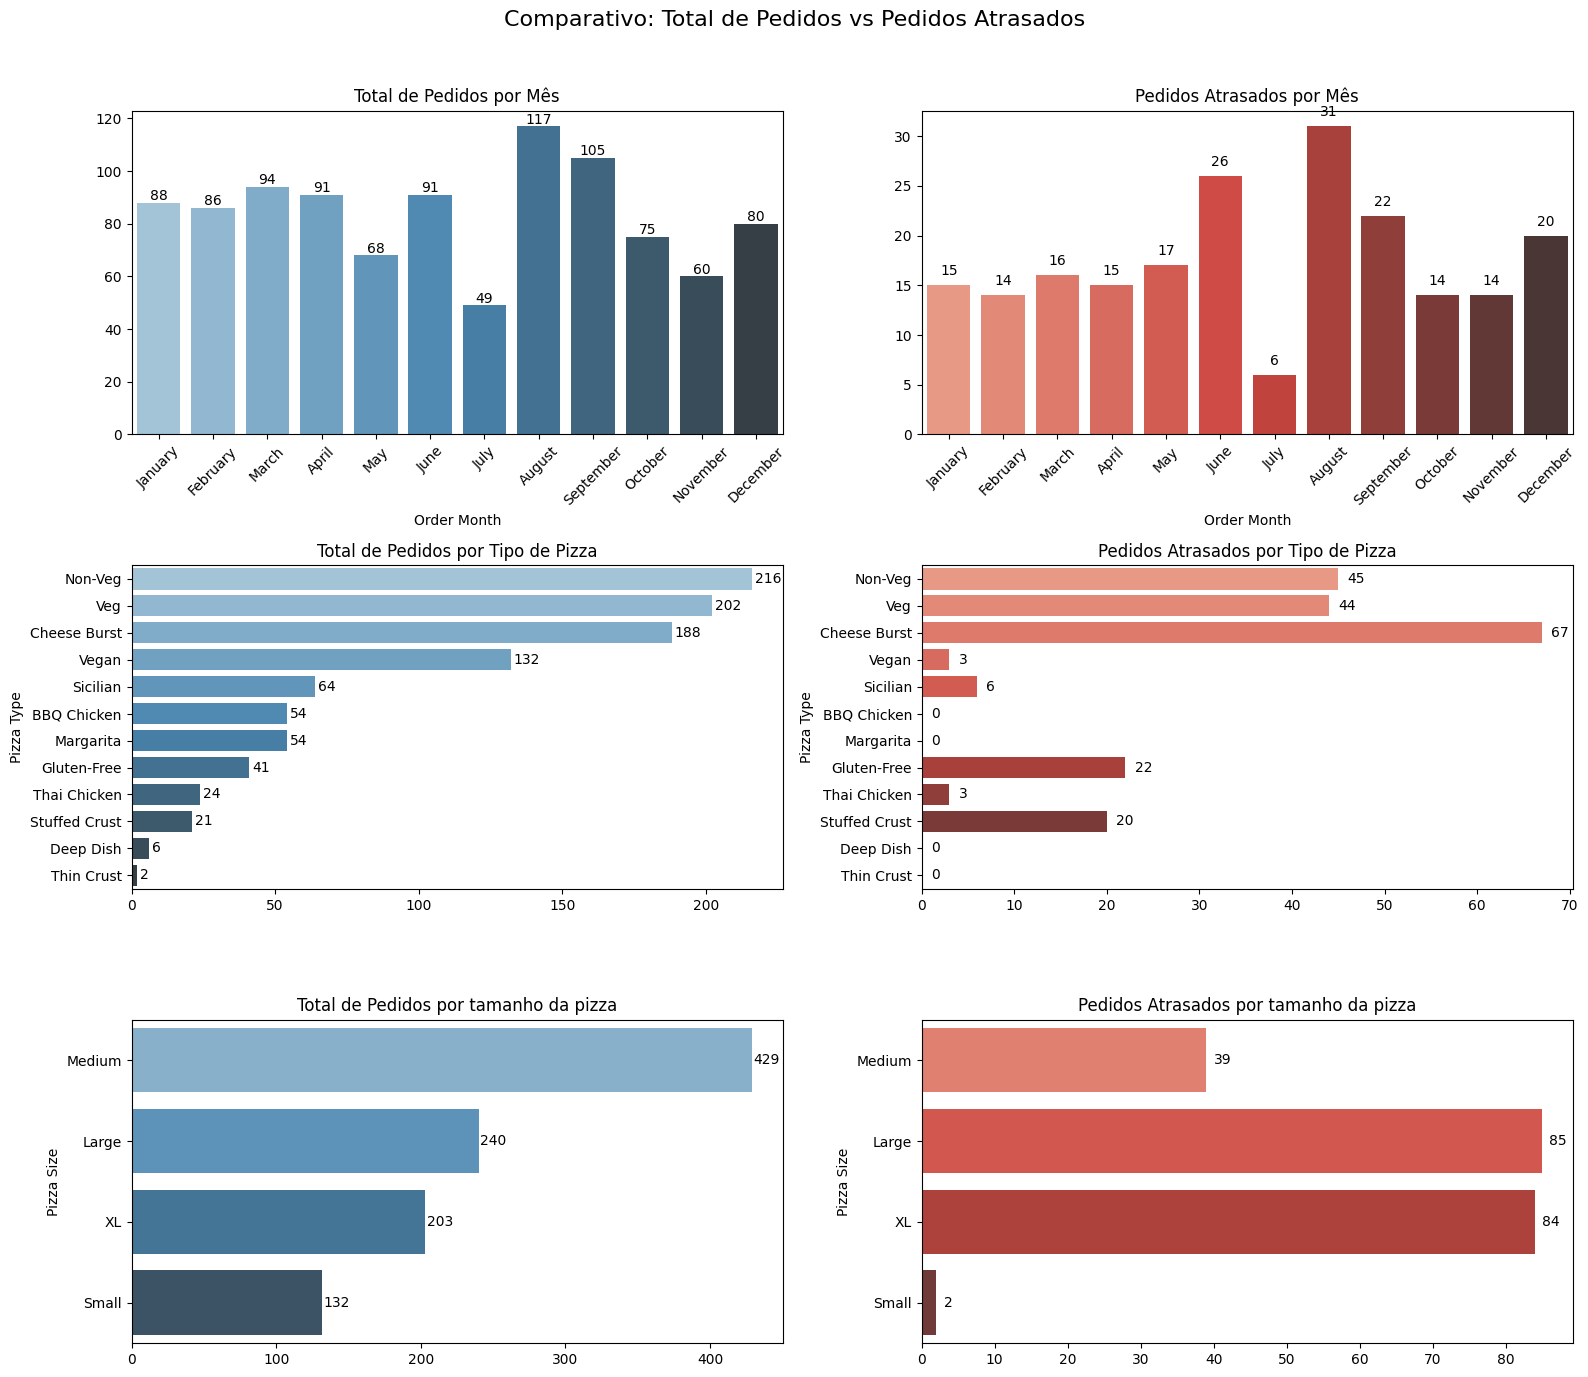

In [ ]:
# Converter coluna de data
df["Order Time"] = pd.to_datetime(df["Order Time"])
df["Order Month"] = df["Order Time"].dt.month_name()


# Criar figura com 3 pares de gráficos lado a lado
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Comparativo: Total de Pedidos vs Pedidos Atrasados", fontsize=16)

# 1. Pedidos por mês
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
total_by_month = df["Order Month"].value_counts().reindex(month_order).fillna(0)
delayed_by_month = df[df["Is Delayed"]]["Order Month"].value_counts().reindex(month_order).fillna(0)

sns.barplot(x=total_by_month.index, y=total_by_month.values, ax=axes[0, 0], hue=total_by_month.index, palette="Blues_d", legend=False)
axes[0, 0].set_title("Total de Pedidos por Mês")
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(total_by_month.values):
    axes[0, 0].text(i, v + 1, str(int(v)), ha='center')

sns.barplot(x=delayed_by_month.index, y=delayed_by_month.values, ax=axes[0, 1], hue=delayed_by_month.index, palette="Reds_d", legend=False)
axes[0, 1].set_title("Pedidos Atrasados por Mês")
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(delayed_by_month.values):
    axes[0, 1].text(i, v + 1, str(int(v)), ha='center')

# 2. Tipos de pizza
total_by_pizza = df["Pizza Type"].value_counts()
delayed_by_pizza = df[df["Is Delayed"]]["Pizza Type"].value_counts().reindex(total_by_pizza.index).fillna(0)

sns.barplot(x=total_by_pizza.values, y=total_by_pizza.index, ax=axes[1, 0], hue=total_by_pizza.index, palette="Blues_d", legend=False)
axes[1, 0].set_title("Total de Pedidos por Tipo de Pizza")
for i, v in enumerate(total_by_pizza.values):
    axes[1, 0].text(v + 1, i, str(int(v)), va='center')

sns.barplot(x=delayed_by_pizza.values, y=delayed_by_pizza.index, ax=axes[1, 1], hue=delayed_by_pizza.index, palette="Reds_d", legend=False)
axes[1, 1].set_title("Pedidos Atrasados por Tipo de Pizza")
for i, v in enumerate(delayed_by_pizza.values):
    axes[1, 1].text(v + 1, i, str(int(v)), va='center')

# 3. Tamanho da Pizza
total_by_payment = df["Pizza Size"].value_counts()
delayed_by_payment = df[df["Is Delayed"]]["Pizza Size"].value_counts().reindex(total_by_payment.index).fillna(0)

sns.barplot(x=total_by_payment.values, y=total_by_payment.index, ax=axes[2, 0], hue=total_by_payment.index, palette="Blues_d", legend=False)
axes[2, 0].set_title("Total de Pedidos por tamanho da pizza")
for i, v in enumerate(total_by_payment.values):
    axes[2, 0].text(v + 1, i, str(int(v)), va='center')

sns.barplot(x=delayed_by_payment.values, y=delayed_by_payment.index, ax=axes[2, 1], hue=delayed_by_payment.index, palette="Reds_d", legend=False)
axes[2, 1].set_title("Pedidos Atrasados por tamanho da pizza")
for i, v in enumerate(delayed_by_payment.values):
    axes[2, 1].text(v + 1, i, str(int(v)), va='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



## Pedidos por mês:
Na comparação da curva de pedidos mensais e pedidos mensais em atraso, notamos uma proporcionalidade, ou seja, os atrasos aumentam à medida que os pedidos são maiores. O mês de junho é o que mais teve atraso.

## Pedidos por tipo de pizza:
Nessa variável a terceira pizza mais vendida é que a sofre mais atrasos na entrega. Ao analisarmos a instância, notamos que nesse tipo de pizza, prevalecem a maior quantidade de ingredientes, combinado com processos mais complexos de produção, levando a demora no momento da preparação. A pizza Stuffed Crust é a que mais teve atraso.

## Pedidos por tamanho de pizza:
As pizzas mais vendidas são as de tamanho médio. Os atrasos estão em maior concentração nos tamanhos maiores, que também concentram tipos de pizza que são mais trabalhosas na preparação. A pizza tamanho XL é a que mais teve atraso.

# Pré-Processamento de Dados
Vamos preparar os dados para modelagem a fim de otimizar o desempenho do algoritimo.

## Verificação e correção caso existam valores Nulos

In [ ]:
# Verificar a presença de valores nulos no dataset
print("Valores nulos no dataset Pizza:")
df.isnull().sum()

Valores nulos no dataset Pizza:


,0
Order ID,0
Restaurant Name,0
Location,0
Order Time,0
Delivery Time,0
Delivery Duration (min),0
Pizza Size,0
Pizza Type,0
Toppings Count,0
Distance (km),0


Não foram identificados valores nulos neste conjunto de dados.

## Identificação e remoção de valores extremos (outliers)

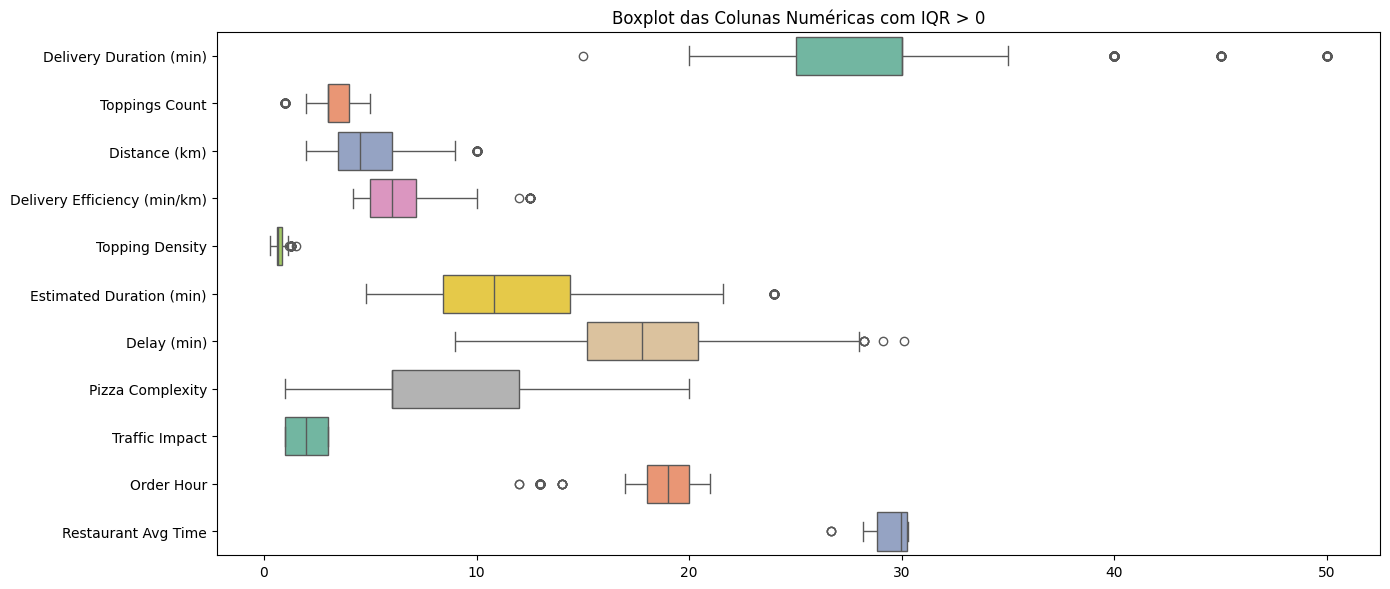

Outliers identificados usando o método IQR:
Delivery Duration (min): 167 outliers
Toppings Count: 43 outliers
Distance (km): 38 outliers
Delivery Efficiency (min/km): 20 outliers
Topping Density: 23 outliers
Estimated Duration (min): 38 outliers
Delay (min): 6 outliers
Pizza Complexity: 0 outliers
Traffic Impact: 0 outliers
Order Hour: 51 outliers
Restaurant Avg Time: 3 outliers


In [ ]:
# # Lista de colunas numéricas relevantes
numeric_cols = [
    'Delivery Duration (min)', 'Toppings Count', 'Distance (km)',
    'Delivery Efficiency (min/km)', 'Topping Density',
    'Estimated Duration (min)', 'Delay (min)', 'Pizza Complexity',
    'Traffic Impact', 'Order Hour', 'Restaurant Avg Time'
]

# Converter colunas para float
df[numeric_cols] = df[numeric_cols].astype(float)

# Dicionário para armazenar contagens de outliers
outlier_counts = {}

# Filtrar colunas com IQR > 0 e identificar outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    if IQR > 0:
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        outlier_counts[col] = len(outliers)

# Gerar boxplot para colunas com IQR > 0
cols_with_iqr = [col for col in numeric_cols if df[col].quantile(0.75) - df[col].quantile(0.25) > 0]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[cols_with_iqr], orient="h", palette="Set2")
plt.title("Boxplot das Colunas Numéricas com IQR > 0")
plt.tight_layout()
plt.show()

# Exibir contagens de outliers
print("Outliers identificados usando o método IQR:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")



Foram identificados 261 outliers, os quais serão removidos.

In [ ]:
# Remove outliers using IQR method for columns with IQR > 0
df_clean = df.copy()
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    if IQR > 0:
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_clean.shape}")
df_clean



Original dataset size: (1004, 25)
Cleaned dataset size: (743, 25)


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25.0,Large,Non-Veg,4.0,5.0,...,0.800000,February,Online,12.0,13.0,False,12.0,3.0,20.0,28.186275
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25.0,XL,Cheese Burst,5.0,4.5,...,1.111111,April,Offline,10.8,14.2,False,20.0,2.0,19.0,29.948454
5,ORD006,Domino's,"New York, NY",2024-01-06 19:00:00,2024-01-06 19:20:00,20.0,Medium,Non-Veg,3.0,3.0,...,1.000000,January,Online,7.2,12.8,False,6.0,3.0,19.0,30.259434
6,ORD007,Papa John's,"Los Angeles, CA",2024-01-07 20:15:00,2024-01-07 20:40:00,25.0,Large,Veg,4.0,4.5,...,0.888889,January,Online,10.8,14.2,False,12.0,2.0,20.0,28.186275
7,ORD008,Little Caesars,"Chicago, IL",2024-01-08 18:30:00,2024-01-08 18:50:00,20.0,Small,Vegan,2.0,2.0,...,1.000000,January,Offline,4.8,15.2,False,2.0,1.0,18.0,28.844221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ORD1001,Domino's,"Albuquerque, NM",2026-07-03 19:00:00,2026-07-03 19:30:00,30.0,Large,Sicilian,4.0,5.5,...,0.727273,July,Online,13.2,16.8,False,12.0,2.0,19.0,30.259434
1000,ORD1002,Pizza Hut,"Atlanta, GA",2026-07-04 20:15:00,2026-07-04 20:45:00,30.0,Medium,Veg,2.0,4.0,...,0.500000,July,Online,9.6,20.4,False,4.0,1.0,20.0,29.948454
1001,ORD1003,Papa John's,"Omaha, NE",2026-07-05 18:30:00,2026-07-05 19:00:00,30.0,Medium,BBQ Chicken,3.0,5.0,...,0.600000,July,Online,12.0,18.0,False,6.0,2.0,18.0,28.186275
1002,ORD1004,Little Caesars,"Louisville, KY",2026-07-06 19:45:00,2026-07-06 20:15:00,30.0,XL,Cheese Burst,5.0,6.0,...,0.833333,July,Online,14.4,15.6,False,20.0,3.0,19.0,28.844221


## Ajustes diversos de dados
Serão realizadas transformações, de modo de que este dataset fique mais limpo e compreensível.

In [ ]:
# Correção de vírgulas decimais para pontos
for col in df_clean.columns:
    if df_clean[col].dtype == object:
        df_clean[col] = df_clean[col].str.replace(",", ".")

# Conversão de colunas numéricas
numeric_cols = [
    'Delivery Duration (min)', 'Toppings Count', 'Distance (km)',
    'Delivery Efficiency (min/km)', 'Topping Density',
    'Estimated Duration (min)', 'Delay (min)', 'Pizza Complexity',
    'Traffic Impact', 'Order Hour', 'Restaurant Avg Time'
]
df_clean[numeric_cols] = df_clean[numeric_cols].astype(float)

# Extração de recursos temporais
df_clean['Order Weekday'] = df['Order Time'].dt.day_name()
df_clean['Order Day'] = df['Order Time'].dt.day


# Define um mapeamento que manipula representações de string e booleanas
bool_map = {
   'VERDADEIRO': 1, 'FALSO': 0,
   'True': 1, 'False': 0,
   True: 1, False: 0
}

# Aplicação do mapeamento às colunas booleanas
for col in ['Is Peak Hour', 'Is Weekend', 'Is Delayed']:
    df_clean[col] = df_clean[col].map(bool_map)


# Colunas categóricas para codificação
categorical_cols = [
    'Restaurant Name', 'Location', 'Pizza Size', 'Pizza Type',
    'Traffic Level', 'Payment Method', 'Order Month',
    'Payment Category', 'Order Weekday'
]
# Criação de coluna 'Categoria de Atraso' com base na coluna 'Delay (min)'
def categorizar_atraso(minutos):
    if minutos <= 10:
        return 'Sem Atraso'
    elif minutos <= 20:
        return 'Leve'
    elif minutos <= 25:
        return 'Moderado'
    else:
        return 'Grave'

df_clean['Categoria de Atraso'] = df_clean['Delay (min)'].apply(categorizar_atraso)
df_clean


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Order Weekday,Order Day,Categoria de Atraso
1,ORD002,Papa John's,Los Angeles. CA,2024-02-14 20:00:00,2024-02-14 20:25:00,-0.466644,Large,Non-Veg,0.798515,0.494464,...,0.494464,-1.180533,0,0.671527,1.679174,1.331713,-1.414174,Wednesday,14,Sem Atraso
3,ORD004,Pizza Hut,Miami. FL,2024-04-10 19:45:00,2024-04-10 20:10:00,-0.466644,XL,Cheese Burst,1.715511,0.083792,...,0.083792,-0.790481,0,2.085470,0.245121,0.139589,0.613482,Wednesday,10,Sem Atraso
5,ORD006,Domino's,New York. NY,2024-01-06 19:00:00,2024-01-06 19:20:00,-1.533464,Medium,Non-Veg,-0.118481,-1.148222,...,-1.148222,-1.245542,0,-0.388929,1.679174,0.139589,0.971312,Saturday,6,Sem Atraso
6,ORD007,Papa John's,Los Angeles. CA,2024-01-07 20:15:00,2024-01-07 20:40:00,-0.466644,Large,Veg,0.798515,0.083792,...,0.083792,-0.790481,0,0.671527,0.245121,1.331713,-1.414174,Sunday,7,Sem Atraso
7,ORD008,Little Caesars,Chicago. IL,2024-01-08 18:30:00,2024-01-08 18:50:00,-1.533464,Small,Vegan,-1.035477,-1.969564,...,-1.969564,-0.465438,0,-1.095901,-1.188932,-1.052534,-0.657106,Monday,8,Sem Atraso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ORD1001,Domino's,Albuquerque. NM,2026-07-03 19:00:00,2026-07-03 19:30:00,0.600176,Large,Sicilian,0.798515,0.905135,...,0.905135,0.054632,0,0.671527,0.245121,0.139589,0.971312,Friday,3,Sem Atraso
1000,ORD1002,Pizza Hut,Atlanta. GA,2026-07-04 20:15:00,2026-07-04 20:45:00,0.600176,Medium,Veg,-1.035477,-0.326879,...,-0.326879,1.224788,0,-0.742415,-1.188932,1.331713,0.613482,Saturday,4,Sem Atraso
1001,ORD1003,Papa John's,Omaha. NE,2026-07-05 18:30:00,2026-07-05 19:00:00,0.600176,Medium,BBQ Chicken,-0.118481,0.494464,...,0.494464,0.444684,0,-0.388929,0.245121,-1.052534,-1.414174,Sunday,5,Sem Atraso
1002,ORD1004,Little Caesars,Louisville. KY,2026-07-06 19:45:00,2026-07-06 20:15:00,0.600176,XL,Cheese Burst,1.715511,1.315807,...,1.315807,-0.335420,0,2.085470,1.679174,0.139589,-0.657106,Monday,6,Sem Atraso


## Divisão do Dataset em conjuntos de treinos e testes

In [ ]:
# Separate features (X) and target (y)
X = df_clean.drop(columns=["Is Delayed"])
y = df_clean["Is Delayed"]

# Display the shapes of the resulting datasets
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")



Features (X) shape: (743, 27)
Target (y) shape: (743,)


In [ ]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (594, 27)
Testing set size: (149, 27)


## Escalonando os dados: Normalização e Padronização

### Normalização

In [ ]:
# Normalizar colunas numéricas
scaler = MinMaxScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])
df_clean

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Order Weekday,Order Day,Categoria de Atraso
1,ORD002,Papa John's,Los Angeles. CA,2024-02-14 20:00:00,2024-02-14 20:25:00,0.333333,Large,Non-Veg,0.75,0.545455,...,0.545455,0.234568,0,0.578947,1.0,0.75,0.000000,Wednesday,14,Leve
3,ORD004,Pizza Hut,Miami. FL,2024-04-10 19:45:00,2024-04-10 20:10:00,0.333333,XL,Cheese Burst,1.00,0.454545,...,0.454545,0.308642,0,1.000000,0.5,0.50,0.839059,Wednesday,10,Leve
5,ORD006,Domino's,New York. NY,2024-01-06 19:00:00,2024-01-06 19:20:00,0.000000,Medium,Non-Veg,0.50,0.181818,...,0.181818,0.222222,0,0.263158,1.0,0.50,0.987132,Saturday,6,Leve
6,ORD007,Papa John's,Los Angeles. CA,2024-01-07 20:15:00,2024-01-07 20:40:00,0.333333,Large,Veg,0.75,0.454545,...,0.454545,0.308642,0,0.578947,0.5,0.75,0.000000,Sunday,7,Leve
7,ORD008,Little Caesars,Chicago. IL,2024-01-08 18:30:00,2024-01-08 18:50:00,0.000000,Small,Vegan,0.25,0.000000,...,0.000000,0.370370,0,0.052632,0.0,0.25,0.313280,Monday,8,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ORD1001,Domino's,Albuquerque. NM,2026-07-03 19:00:00,2026-07-03 19:30:00,0.666667,Large,Sicilian,0.75,0.636364,...,0.636364,0.469136,0,0.578947,0.5,0.50,0.987132,Friday,3,Leve
1000,ORD1002,Pizza Hut,Atlanta. GA,2026-07-04 20:15:00,2026-07-04 20:45:00,0.666667,Medium,Veg,0.25,0.363636,...,0.363636,0.691358,0,0.157895,0.0,0.75,0.839059,Saturday,4,Moderado
1001,ORD1003,Papa John's,Omaha. NE,2026-07-05 18:30:00,2026-07-05 19:00:00,0.666667,Medium,BBQ Chicken,0.50,0.545455,...,0.545455,0.543210,0,0.263158,0.5,0.25,0.000000,Sunday,5,Leve
1002,ORD1004,Little Caesars,Louisville. KY,2026-07-06 19:45:00,2026-07-06 20:15:00,0.666667,XL,Cheese Burst,1.00,0.727273,...,0.727273,0.395062,0,1.000000,1.0,0.50,0.313280,Monday,6,Leve


### Padronização

In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])
df_clean





,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Order Weekday,Order Day,Categoria de Atraso
1,ORD002,Papa John's,Los Angeles. CA,2024-02-14 20:00:00,2024-02-14 20:25:00,-0.466644,Large,Non-Veg,0.798515,0.494464,...,0.494464,-1.180533,0,0.671527,1.679174,1.331713,-1.414174,Wednesday,14,Leve
3,ORD004,Pizza Hut,Miami. FL,2024-04-10 19:45:00,2024-04-10 20:10:00,-0.466644,XL,Cheese Burst,1.715511,0.083792,...,0.083792,-0.790481,0,2.085470,0.245121,0.139589,0.613482,Wednesday,10,Leve
5,ORD006,Domino's,New York. NY,2024-01-06 19:00:00,2024-01-06 19:20:00,-1.533464,Medium,Non-Veg,-0.118481,-1.148222,...,-1.148222,-1.245542,0,-0.388929,1.679174,0.139589,0.971312,Saturday,6,Leve
6,ORD007,Papa John's,Los Angeles. CA,2024-01-07 20:15:00,2024-01-07 20:40:00,-0.466644,Large,Veg,0.798515,0.083792,...,0.083792,-0.790481,0,0.671527,0.245121,1.331713,-1.414174,Sunday,7,Leve
7,ORD008,Little Caesars,Chicago. IL,2024-01-08 18:30:00,2024-01-08 18:50:00,-1.533464,Small,Vegan,-1.035477,-1.969564,...,-1.969564,-0.465438,0,-1.095901,-1.188932,-1.052534,-0.657106,Monday,8,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ORD1001,Domino's,Albuquerque. NM,2026-07-03 19:00:00,2026-07-03 19:30:00,0.600176,Large,Sicilian,0.798515,0.905135,...,0.905135,0.054632,0,0.671527,0.245121,0.139589,0.971312,Friday,3,Leve
1000,ORD1002,Pizza Hut,Atlanta. GA,2026-07-04 20:15:00,2026-07-04 20:45:00,0.600176,Medium,Veg,-1.035477,-0.326879,...,-0.326879,1.224788,0,-0.742415,-1.188932,1.331713,0.613482,Saturday,4,Moderado
1001,ORD1003,Papa John's,Omaha. NE,2026-07-05 18:30:00,2026-07-05 19:00:00,0.600176,Medium,BBQ Chicken,-0.118481,0.494464,...,0.494464,0.444684,0,-0.388929,0.245121,-1.052534,-1.414174,Sunday,5,Leve
1002,ORD1004,Little Caesars,Louisville. KY,2026-07-06 19:45:00,2026-07-06 20:15:00,0.600176,XL,Cheese Burst,1.715511,1.315807,...,1.315807,-0.335420,0,2.085470,1.679174,0.139589,-0.657106,Monday,6,Leve


1 - Corrigir valores ausentes (missing): Imputação,eliminação
2 - Identificar ou remover valores extremos( outliers)
3 - Criação de Variáveis: Concatenações,junção de dados...
4 - One-hot enconding e LabelEnconding
5 - EScalonar os dados: Normalização, Padronização ou Binarização

## Representação gráfica das colunas númericas padronizadas

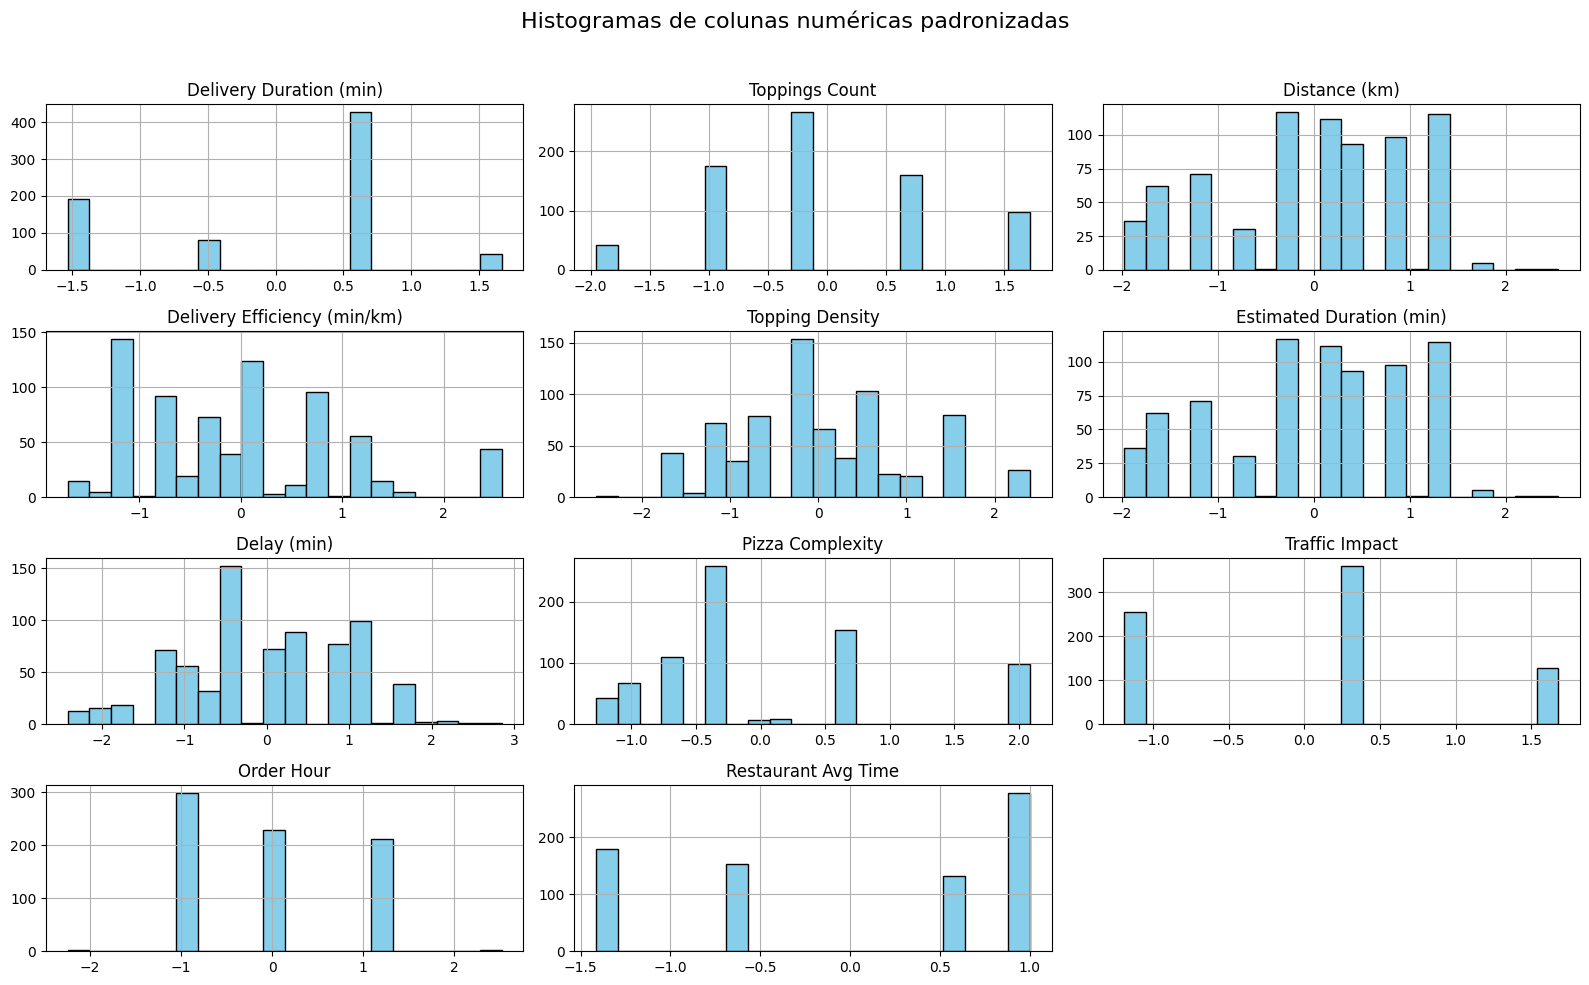

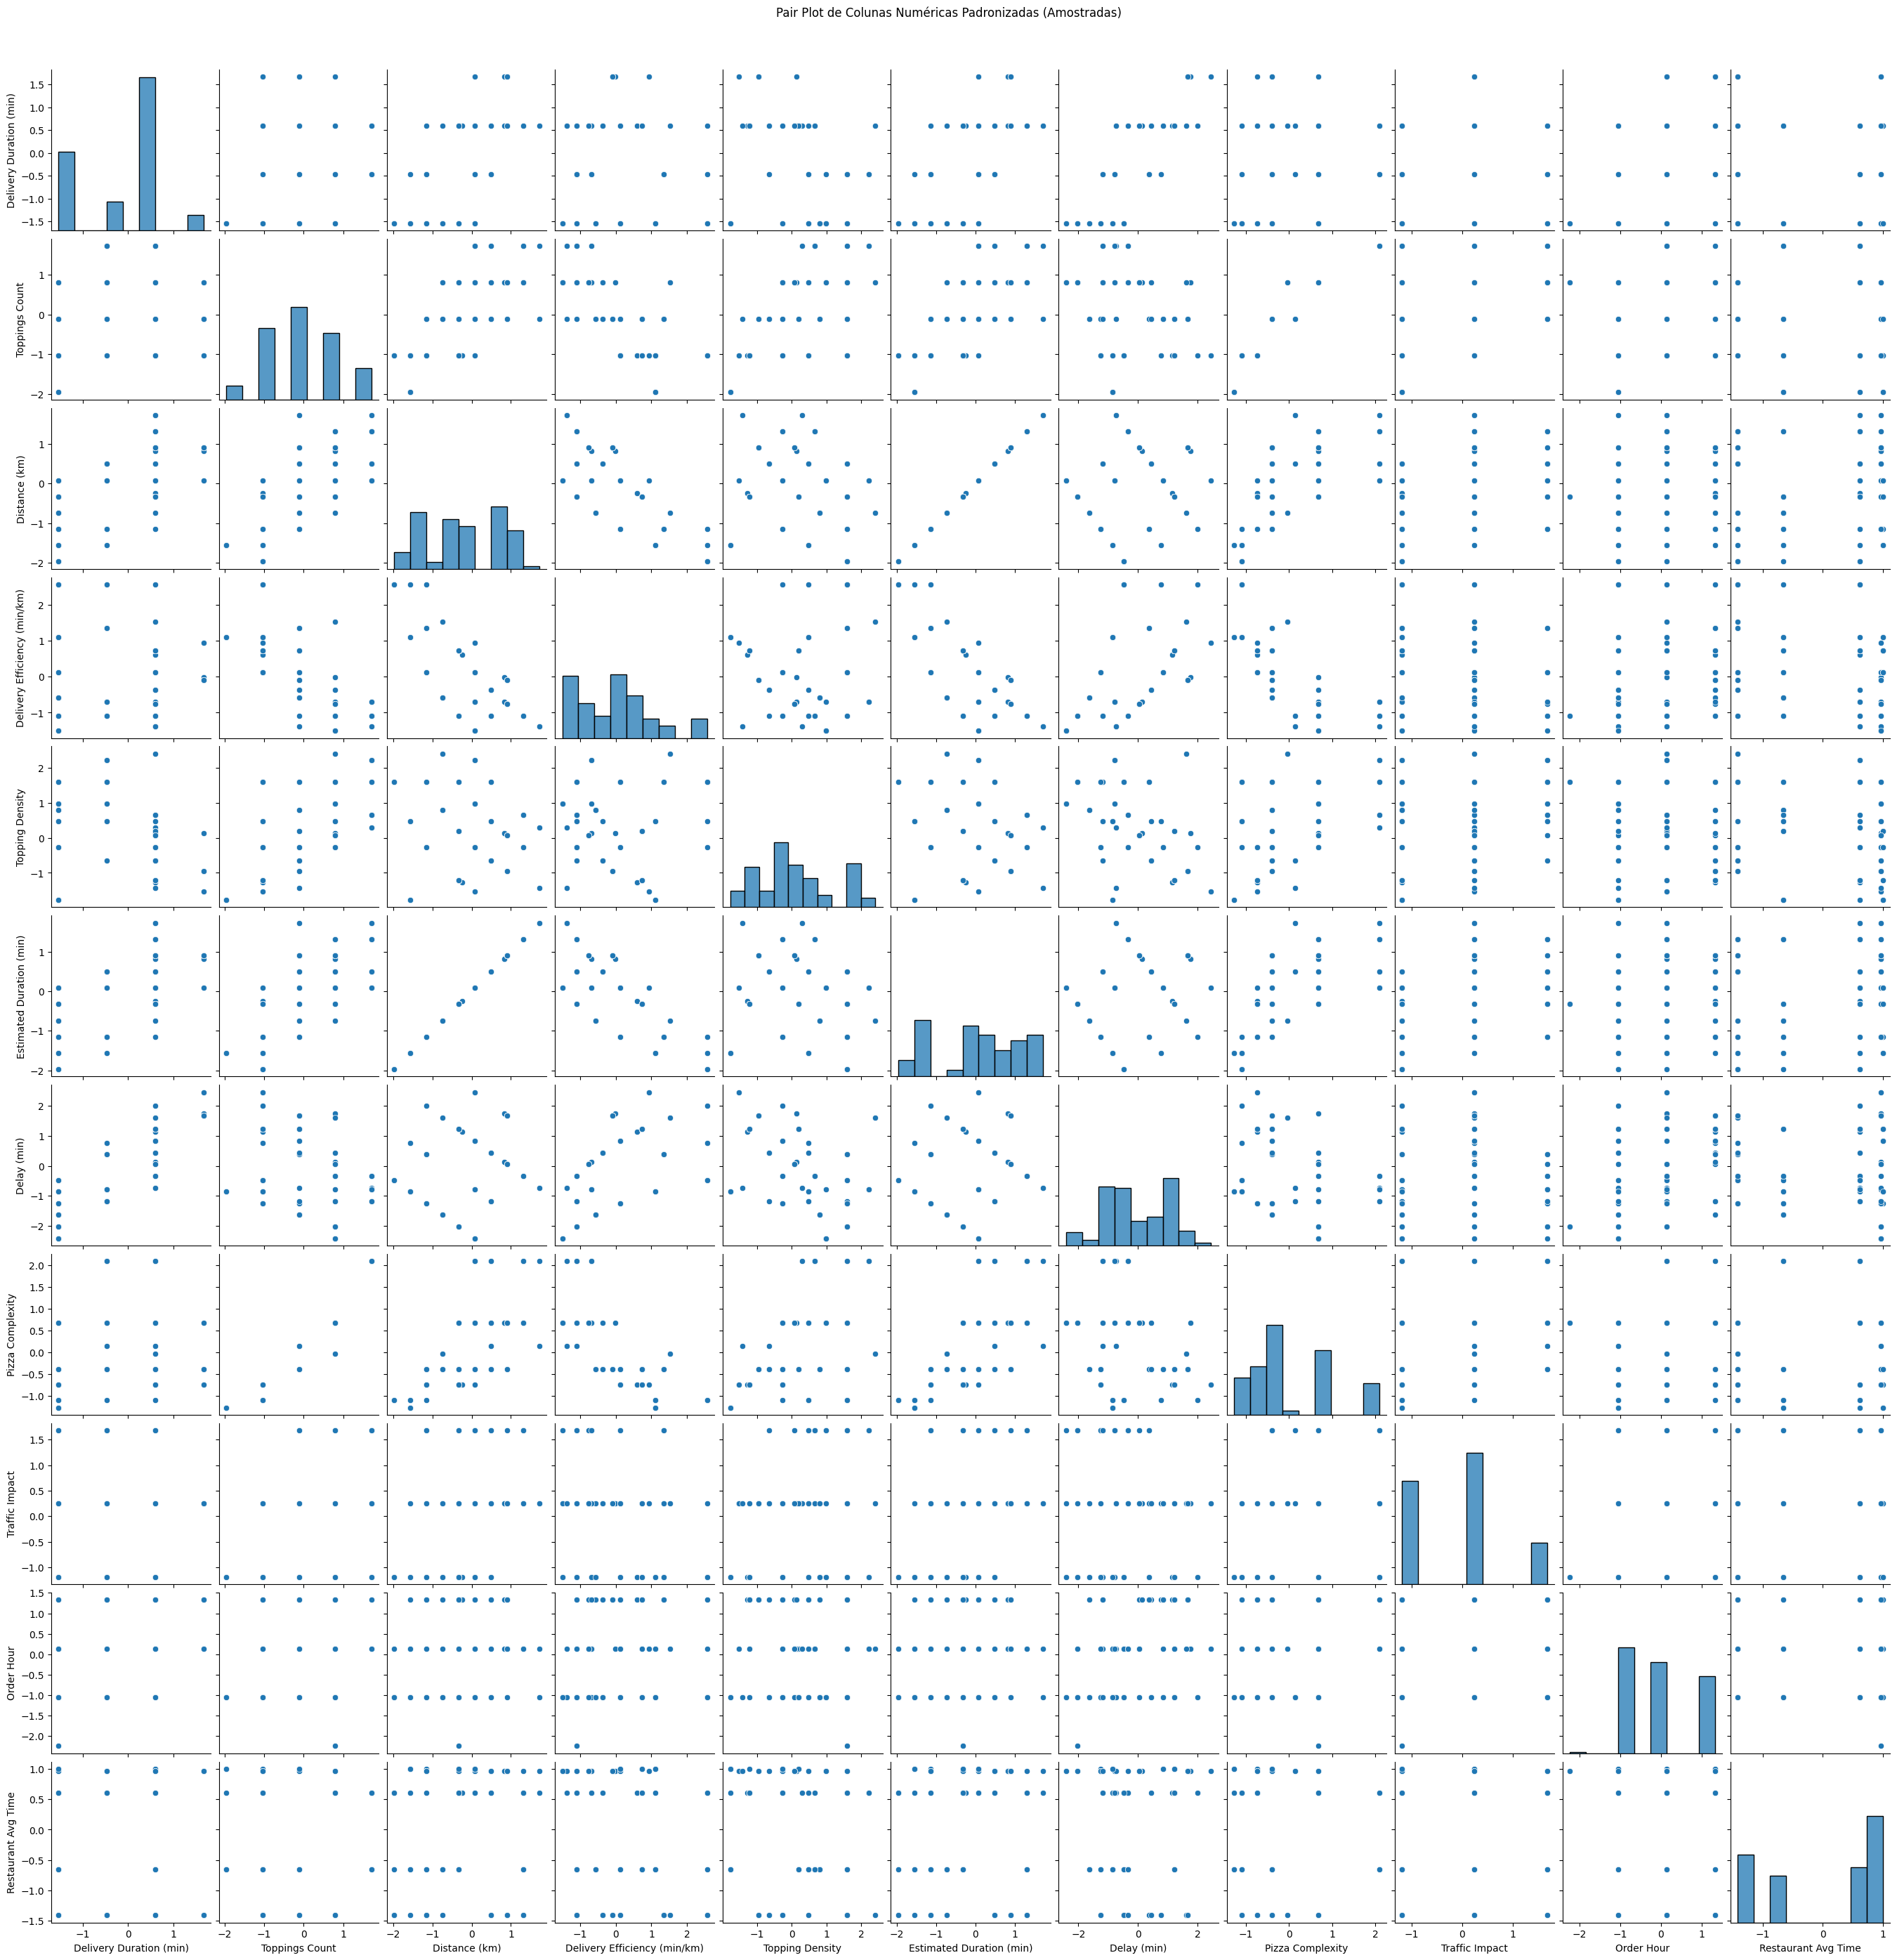

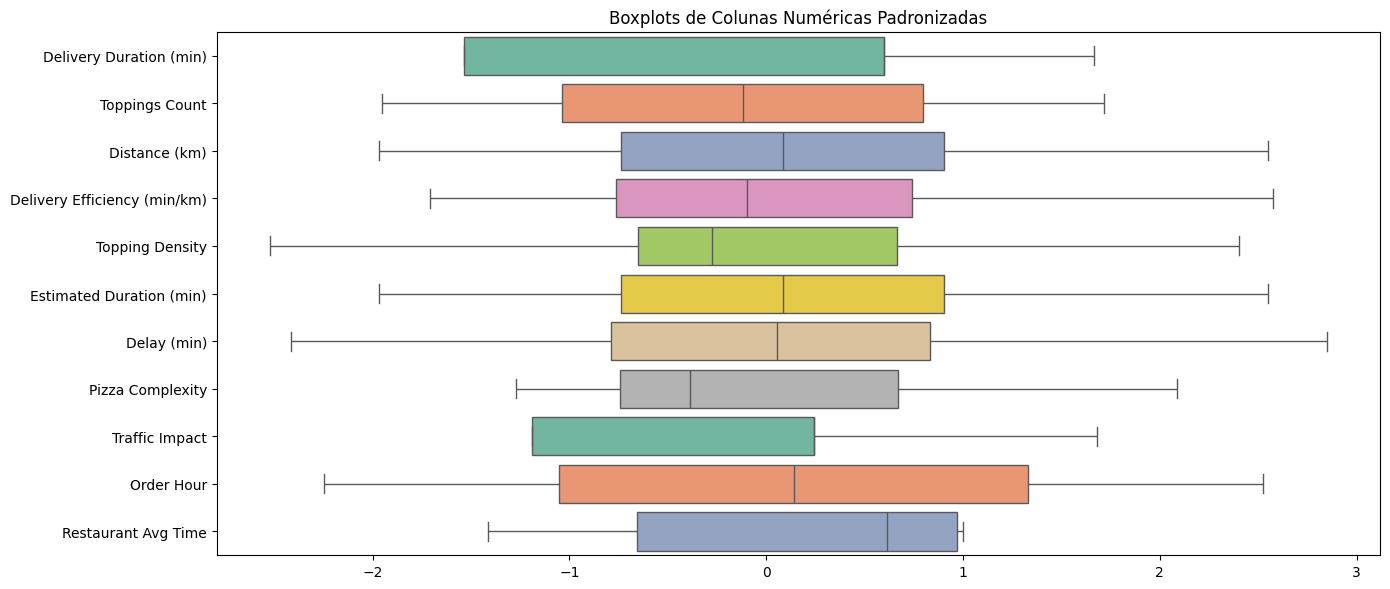

In [ ]:
# Seleção apenas das colunas numéricas padronizadas
numeric_cols = [
    'Delivery Duration (min)', 'Toppings Count', 'Distance (km)',
    'Delivery Efficiency (min/km)', 'Topping Density',
    'Estimated Duration (min)', 'Delay (min)', 'Pizza Complexity',
    'Traffic Impact', 'Order Hour', 'Restaurant Avg Time'
]

# Plot histogramas
df_clean[numeric_cols].hist(bins=20, figsize=(16, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramas de colunas numéricas padronizadas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot pairplot (Amostra do desempenho)
sns.pairplot(df_clean[numeric_cols].sample(200, random_state=42))
plt.suptitle("Pair Plot de Colunas Numéricas Padronizadas (Amostradas)", y=1.02)
plt.show()

# Plot boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplots de Colunas Numéricas Padronizadas")
plt.tight_layout()
plt.show()



In [ ]:

# Save the finalized version to a new Excel file
final_filename = "final_standardized_pizza_data.xlsx"
df.to_excel(final_filename, index=False)

print(f"Finalized dataset saved as {final_filename}")


Finalized dataset saved as final_standardized_pizza_data.xlsx


## Análise visual das distribuições das variáveis padronizadas com foco na variável-alvo "Is Delayed":

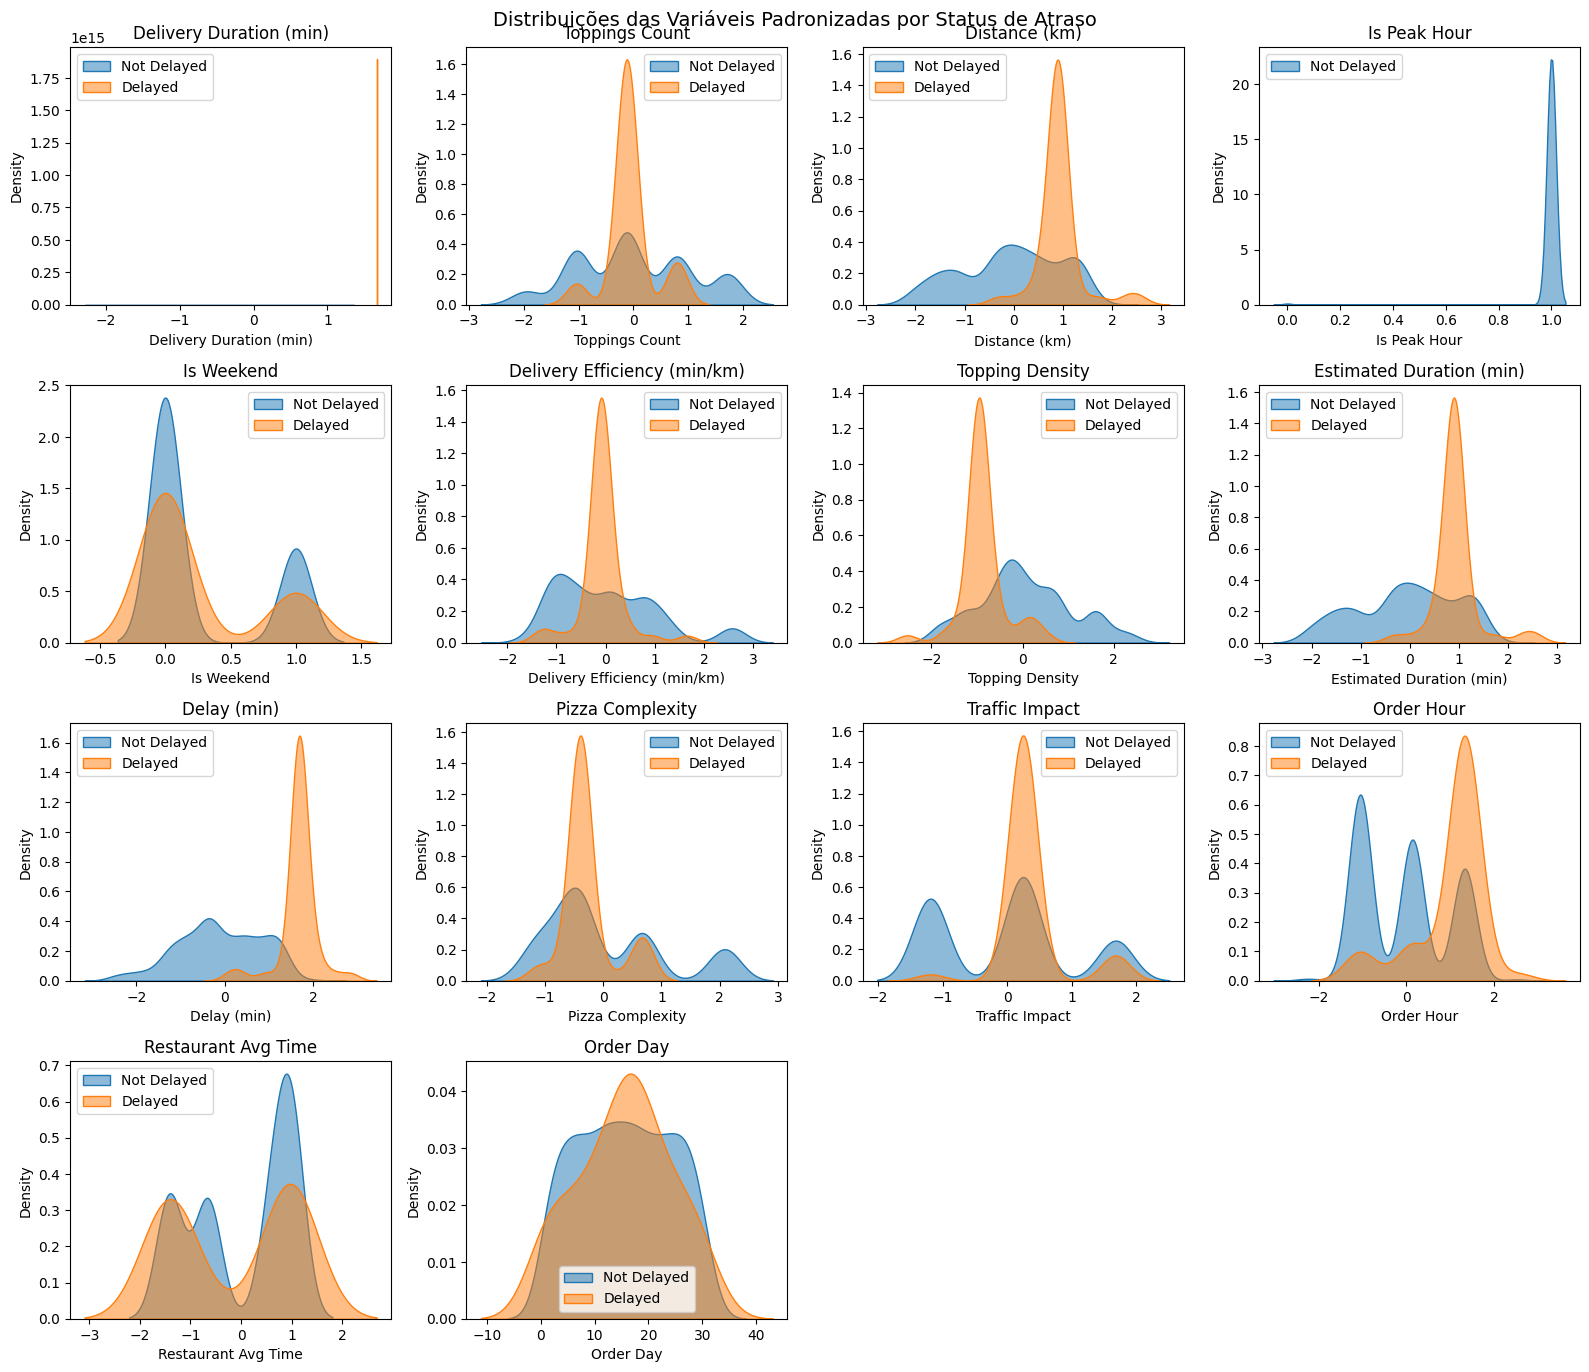

In [ ]:
# Convert 'Is Delayed' to numeric if not already
df_clean['Is Delayed'] = df_clean['Is Delayed'].astype(int)

# Separate delayed and non-delayed deliveries
delayed = df_clean[df_clean['Is Delayed'] == 1]
not_delayed = df_clean[df['Is Delayed'] == 0]

# Select only numeric columns for comparison
numeric_cols = df_clean.select_dtypes(include='number').columns.drop('Is Delayed')

# Plot distributions for each numeric feature
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6, 4, i)
    sns.kdeplot(data=not_delayed, x=col, label='Not Delayed', fill=True, alpha=0.5)
    sns.kdeplot(data=delayed, x=col, label='Delayed', fill=True, alpha=0.5)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.suptitle("Distribuições das Variáveis Padronizadas por Status de Atraso", fontsize=14, y=1)
plt.show()



## Mapa de Correlação - Is Delayed

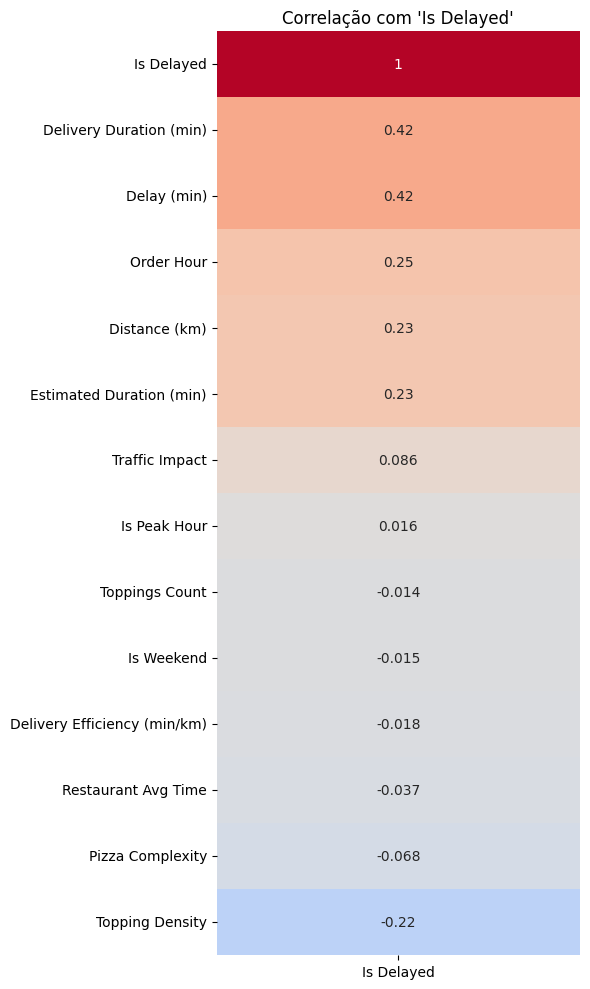

In [ ]:

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Focus on correlations with 'Is Delayed'
correlation_with_delay = correlation_matrix[['Is Delayed']].sort_values(by='Is Delayed', ascending=False)

# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(correlation_with_delay, annot=True, cmap='coolwarm', center=0, cbar=False)
plt.title("Correlação com 'Is Delayed'")
plt.tight_layout()
plt.show()


# Conclusão:
As variáveis que mais influenciam no atraso das entregas são:
- Delivery Duration (min)
- Delay (min)
- Order Hour
- Estimated Duration (min)
- Distance (km)
- Delivery Efficiency (min/km)


Essas variáveis estão fortemente associadas ao comportamento de atraso, indicando que tempo e eficiência logística são fatores críticos.

As distribuições das variáveis entre entregas com e sem atraso mostram padrões distintos:

- Entregas atrasadas tendem a ter maior duração, maior distância e horários de pedido mais concentrados.
- A variável "Order Hour" sugere que certos horários do dia (como picos de demanda) estão mais associados a atrasos.
- A variável Estimated Duration pode estar equivocada, sendo necessária uma reavalição da estimativa.

A análise mostra que o atraso nas entregas está fortemente relacionado a fatores operacionais como tempo de entrega, eficiência e horário do pedido. Esses insights podem ser utilizados para otimizar processos logísticos e reduzir atrasos futuros.
